In [7]:
#Criar 'order_count'= somatório das colunas dow_0 a dow_6
df['order_count'] = df[[f'DOW_{i}' for i in range(7)]].sum(axis=1)

#Criar 'price_per_order' dividindo a soma das colunas CUI_* pelo 'order_count'
culinarias = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
              'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
              'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 
              'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 
              'CUI_Thai']

# Somar o gasto total em culinária e dividir pelo número de pedidos ('order_count')
df['price_per_order'] = df[culinarias].sum(axis=1) / df['order_count']

# Filtrar o DataFrame para remover linhas onde order_count é 0
df_filtered = df[df['order_count'] > 0].copy()

# Calcular quantas observações foram perdidas
observacoes_perdidas = len(df) - len(df_filtered)

# Exibir os resultados
print(f"Número total de observações: {len(df)}")
print(f"Número de observações após filtro: {len(df_filtered)}")
print(f"Número de observações perdidas: {observacoes_perdidas}")

Número total de observações: 31888
Número de observações após filtro: 31750
Número de observações perdidas: 138


# first_order & last_order

FIRST_ORDER:

Esta variável toma valores entre 0 e 90 e apresenta 106 missings (31782 obs)   
Durante os 3 meses foi mais frequente os consumidores mandarem vir pela 1a vez nos dias:   
0.0 __     4.518281   
1.0 __     3.181046   
6.0 __     3.136996   
2.0 __     2.941917   
3.0 __     2.938770   
7.0 __     2.938770   
5.0 __     2.891574      
50%         22.000000   
75%         45.000000

(+ estatística)      
Assimetria: 0.75 dist. pouco assimétrica à direita(+)   
Curtose: -0.50 significa que a dist. tem menos dados em torno da média (menos picos) e mais dados nas caudas.   
Média: 28.48     
Variância: 581.248   
Desvio padrão: 24.109


LAST_ORDER:

Esta variável toma valores entre 0 e 90 e não tem missings   
Durante os 3 meses foi mais frequente os consumidores mandarem vir pela última vez nos dias:   
89 __   5.371927   
88 __   4.515805   
84 __   3.822755   
87 __   3.687908   
83 __   3.499749   
86 __   3.280231   
25%         49   
50%         70   
75%         83   

(+ estatística)      
Assimetria: -0.93 dist. pouco assimétrica à esquerda(-) significa que a maioria dos dados está concentrada à direita da média e há alguns valores extremos à esquerda
Curtose:  -0.13 significa que a dist. é mais plana do que a distribuição normal, indicando uma dispersão menor dos dados em torno da média.
Média: 63.68   
Variância: 539.45   
Desvio padrão: 23.22   

In [22]:
"""
# Encontrar casos onde first_order é maior que last_order
casos_invalidos = df[df['first_order'] > df['last_order']]

# Exibir os casos encontrados
print("Casos onde first_order é maior que last_order:")
print(casos_invalidos)
print(f"\nNúmero total de casos encontrados: {len(casos_invalidos)}")
"""

'\n# Encontrar casos onde first_order é maior que last_order\ncasos_invalidos = df[df[\'first_order\'] > df[\'last_order\']]\n\n# Exibir os casos encontrados\nprint("Casos onde first_order é maior que last_order:")\nprint(casos_invalidos)\nprint(f"\nNúmero total de casos encontrados: {len(casos_invalidos)}")\n'

In [30]:
"""# Filtrar os dados onde first_order é 0
df_first_order_zero = df[df['first_order'] == 0]

# Visualizar last_order para esses casos

sns.histplot(df_first_order_zero['last_order'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição de Last Order onde First Order é 0')
plt.xlabel('Last Order (dias desde o início)')
plt.ylabel('Frequência')
plt.show()"""

"# Filtrar os dados onde first_order é 0\ndf_first_order_zero = df[df['first_order'] == 0]\n\n# Visualizar last_order para esses casos\n\nsns.histplot(df_first_order_zero['last_order'], bins=30, kde=True, color='skyblue')\nplt.title('Distribuição de Last Order onde First Order é 0')\nplt.xlabel('Last Order (dias desde o início)')\nplt.ylabel('Frequência')\nplt.show()"

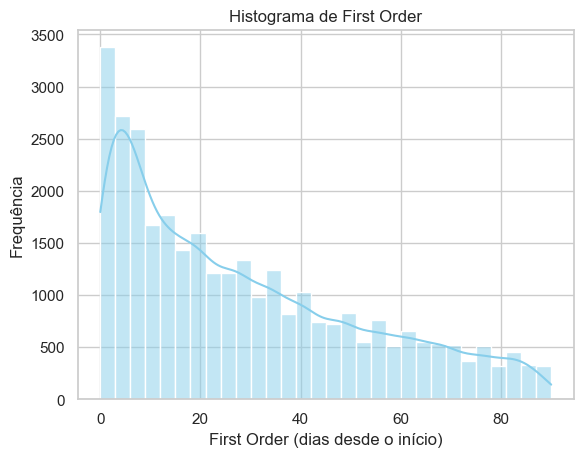

In [28]:
# Criar histograma
sns.histplot(data=df_filtered, x='first_order', bins=30, kde=True, color='skyblue')
plt.title('Histograma de First Order')
plt.xlabel('First Order (dias desde o início)')
plt.ylabel('Frequência')
plt.show()

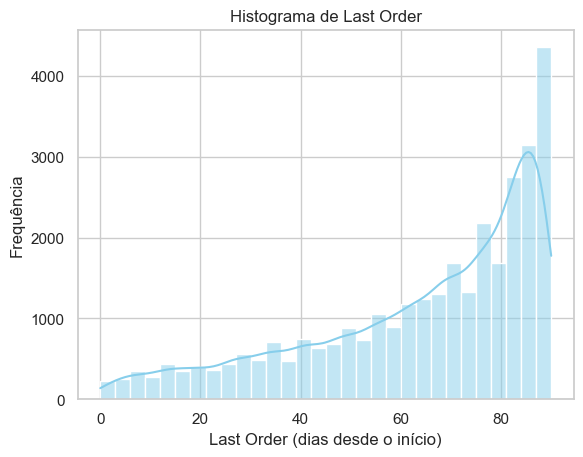

In [27]:
sns.histplot(data=df_filtered, x='last_order', bins=30, kde=True, color='skyblue')
plt.title('Histograma de Last Order')
plt.xlabel('Last Order (dias desde o início)')
plt.ylabel('Frequência')
plt.show()

### customer_region

As pessoas da região 2440 foram as que, em média, pediram pela 1º vez mais rápido

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_23100\198445147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='customer_region', y='first_order', palette='viridis')


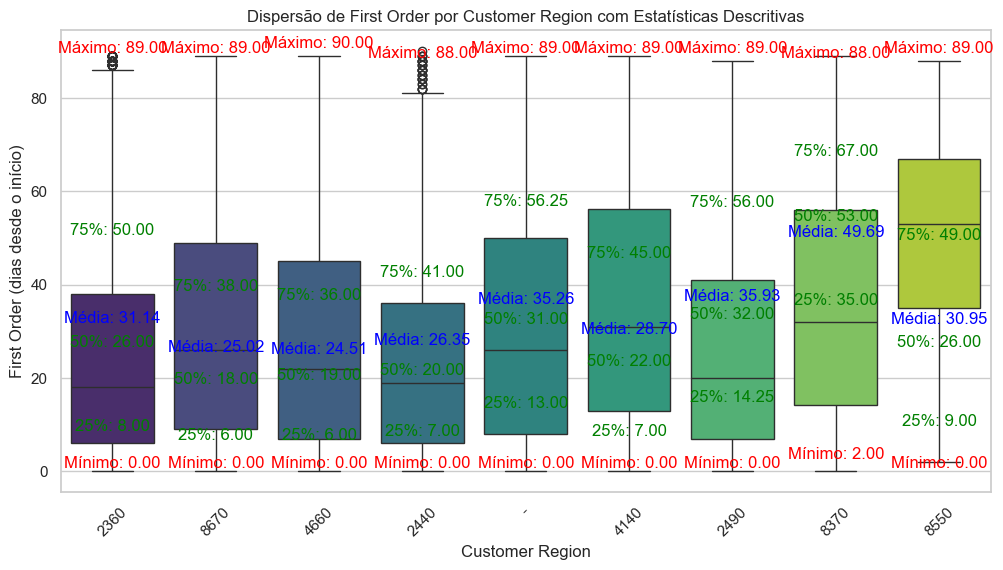

In [17]:
# Criar um box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='customer_region', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
stats = df.groupby('customer_region')['first_order'].describe()

# Adicionar as estatísticas ao gráfico
for i, region in enumerate(stats.index):
    # Extrair as estatísticas
    mean = stats.loc[region, 'mean']
    min_val = stats.loc[region, 'min']
    max_val = stats.loc[region, 'max']
    q25 = stats.loc[region, '25%']
    q50 = stats.loc[region, '50%']
    q75 = stats.loc[region, '75%']

    # Adicionar texto ao gráfico
    ax.text(i, mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Customer Region com Estatísticas Descritivas')
plt.xlabel('Customer Region')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

### customer_age

In [31]:
"""# Criar gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='customer_age', y='first_order', alpha=0.6, color='orange')
plt.title('Dispersão de First Order por Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('First Order (dias desde o início)')
plt.grid(True)
plt.show()"""

"# Criar gráfico de dispersão\nplt.figure(figsize=(12, 6))\nsns.scatterplot(data=df_filtered, x='customer_age', y='first_order', alpha=0.6, color='orange')\nplt.title('Dispersão de First Order por Customer Age')\nplt.xlabel('Customer Age')\nplt.ylabel('First Order (dias desde o início)')\nplt.grid(True)\nplt.show()"

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_23100\2292130405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='age_group', y='first_order', palette='viridis')


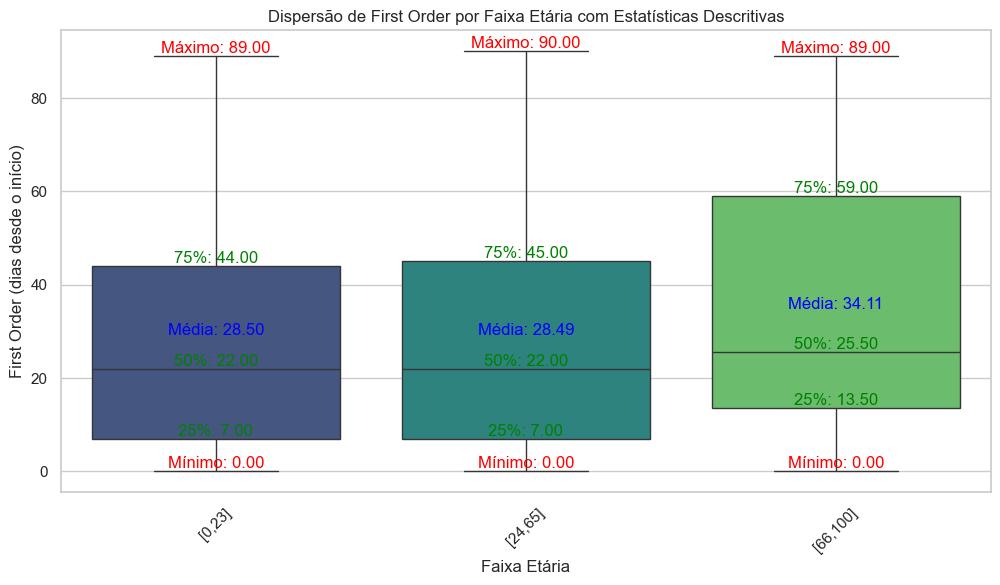

In [34]:
# Agrupar customer_age em faixas etárias
bins = [0, 23, 65, 100]
labels = ['[0,23]', '[24,65]', '[66,100]']
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=True)

# Criar um box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='age_group', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
stats = df.groupby('age_group')['first_order'].describe()

# Adicionar as estatísticas ao gráfico
for i, group in enumerate(stats.index):
    # Extrair as estatísticas
    mean = stats.loc[group, 'mean']
    min_val = stats.loc[group, 'min']
    max_val = stats.loc[group, 'max']
    q25 = stats.loc[group, '25%']
    q50 = stats.loc[group, '50%']
    q75 = stats.loc[group, '75%']

    # Adicionar texto ao gráfico
    ax.text(i, mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Faixa Etária com Estatísticas Descritivas')
plt.xlabel('Faixa Etária')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

### vendor_count

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_23100\3166807821.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='vendor_count_grouped', y='first_order', palette='viridis')


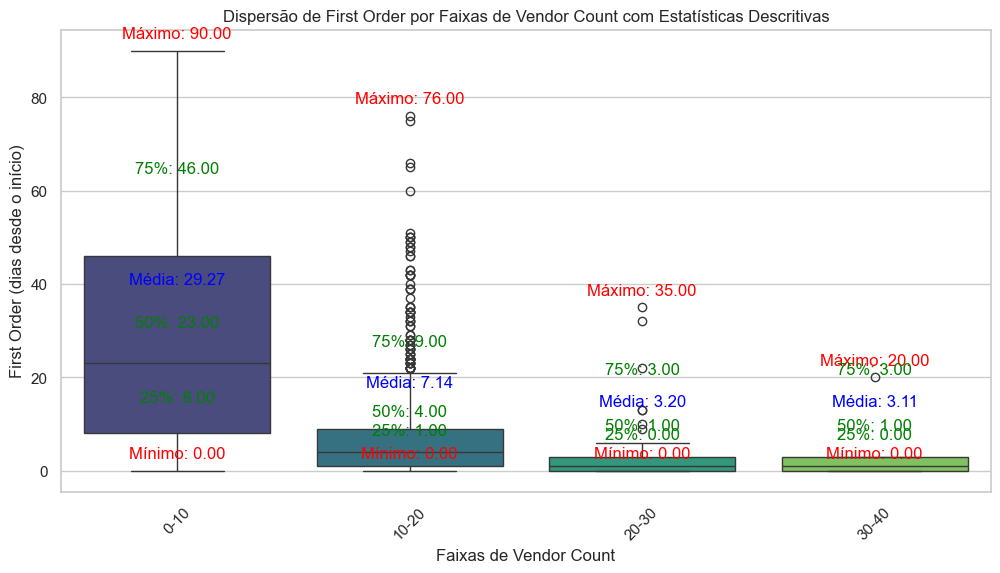

In [57]:
# Definir as faixas para agrupamento de vendor_count
bins = [0, 10, 20, 30, 40]
labels = ['0-10', '10-20', '20-30', '30-40']
df['vendor_count_grouped'] = pd.cut(df['vendor_count'], bins=bins, labels=labels, right=False)

# Criar um box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='vendor_count_grouped', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
stats = df.groupby('vendor_count_grouped')['first_order'].describe()

# Adicionar as estatísticas ao gráfico com deslocamentos maiores
offset_mean = 10.0  # Deslocamento para a média
offset_min = 2.0   # Deslocamento para o mínimo
offset_max = 2.0   # Deslocamento para o máximo
offset_q25 = 6.0   # Deslocamento para 25% (aumentado)
offset_q50 = 7.0   # Deslocamento para 50% (aumentado)
offset_q75 = 17.0   # Deslocamento para 75% (aumentado)

for i, group in enumerate(stats.index):
    # Extrair as estatísticas
    mean = stats.loc[group, 'mean']
    min_val = stats.loc[group, 'min']
    max_val = stats.loc[group, 'max']
    q25 = stats.loc[group, '25%']
    q50 = stats.loc[group, '50%']
    q75 = stats.loc[group, '75%']

    # Adicionar texto ao gráfico com deslocamento
    ax.text(i, mean + offset_mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val + offset_min, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val + offset_max, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25 + offset_q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50 + offset_q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75 + offset_q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Faixas de Vendor Count com Estatísticas Descritivas')
plt.xlabel('Faixas de Vendor Count')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

### product_count

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_23100\3653034405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='product_count_grouped', y='first_order', palette='viridis')


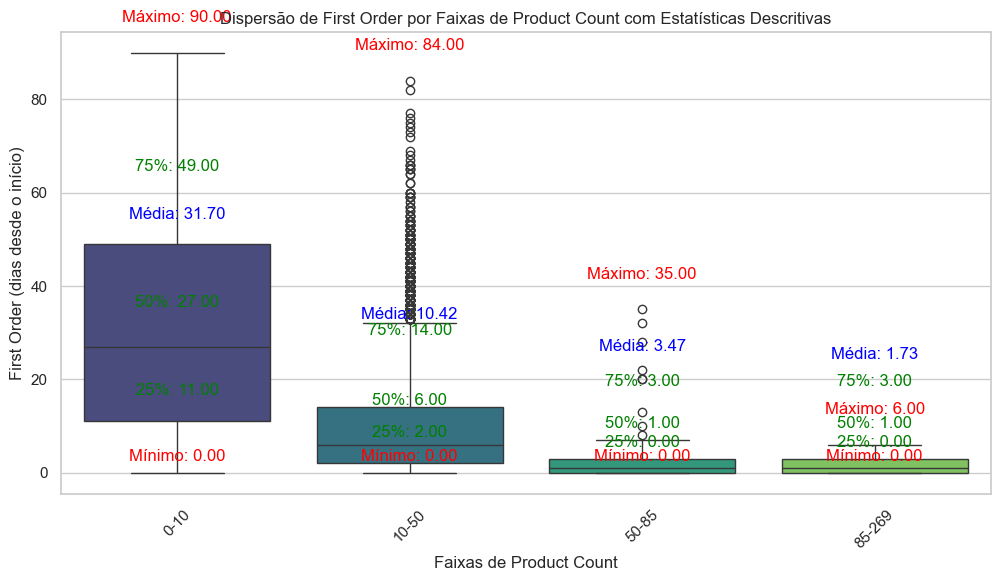

In [81]:
# Definir as faixas para agrupamento de product_count
bins = [0, 10, 50, 85, 269]
labels = ['0-10', '10-50', '50-85', '85-269']
df['product_count_grouped'] = pd.cut(df['product_count'], bins=bins, labels=labels, right=False)

# Criar um box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='product_count_grouped', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
stats = df.groupby('product_count_grouped')['first_order'].describe()

# Adicionar as estatísticas ao gráfico com deslocamentos
offset_mean = 22.0  # Deslocamento para a média
offset_min = 2.0   # Deslocamento para o mínimo
offset_max = 6.0   # Deslocamento para o máximo
offset_q25 = 5.0   # Deslocamento para 25%
offset_q50 = 8.0   # Deslocamento para 50%
offset_q75 = 15.0   # Deslocamento para 75%

for i, group in enumerate(stats.index):
    # Extrair as estatísticas
    mean = stats.loc[group, 'mean']
    min_val = stats.loc[group, 'min']
    max_val = stats.loc[group, 'max']
    q25 = stats.loc[group, '25%']
    q50 = stats.loc[group, '50%']
    q75 = stats.loc[group, '75%']

    # Adicionar texto ao gráfico com deslocamento
    ax.text(i, mean + offset_mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val + offset_min, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val + offset_max, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25 + offset_q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50 + offset_q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75 + offset_q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Faixas de Product Count com Estatísticas Descritivas')
plt.xlabel('Faixas de Product Count')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

### last_promo

In [86]:
"""
# Criar um box plot para 'last_promo'
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='last_promo', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
stats = df.groupby('last_promo')['first_order'].describe()

# Adicionar deslocamentos para as estatísticas
offset_mean = 10.0  # Deslocamento para a média
offset_min = 2.0   # Deslocamento para o mínimo
offset_max = 2.0   # Deslocamento para o máximo
offset_q25 = 5.0   # Deslocamento para 25%
offset_q50 = 8.0   # Deslocamento para 50%
offset_q75 = 9.0  # Deslocamento para 75%

# Adicionar as estatísticas ao gráfico com deslocamento
for i, promo in enumerate(stats.index):
    # Extrair as estatísticas
    mean = stats.loc[promo, 'mean']
    min_val = stats.loc[promo, 'min']
    max_val = stats.loc[promo, 'max']
    q25 = stats.loc[promo, '25%']
    q50 = stats.loc[promo, '50%']
    q75 = stats.loc[promo, '75%']

    # Adicionar texto ao gráfico com deslocamento
    ax.text(i, mean + offset_mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val + offset_min, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val + offset_max, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25 + offset_q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50 + offset_q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75 + offset_q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Last Promo com Estatísticas Descritivas')
plt.xlabel('Last Promo')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()"""

"\n# Criar um box plot para 'last_promo'\nplt.figure(figsize=(12, 6))\nax = sns.boxplot(data=df, x='last_promo', y='first_order', palette='viridis')\n\n# Calcular as estatísticas descritivas\nstats = df.groupby('last_promo')['first_order'].describe()\n\n# Adicionar deslocamentos para as estatísticas\noffset_mean = 10.0  # Deslocamento para a média\noffset_min = 2.0   # Deslocamento para o mínimo\noffset_max = 2.0   # Deslocamento para o máximo\noffset_q25 = 5.0   # Deslocamento para 25%\noffset_q50 = 8.0   # Deslocamento para 50%\noffset_q75 = 9.0  # Deslocamento para 75%\n\n# Adicionar as estatísticas ao gráfico com deslocamento\nfor i, promo in enumerate(stats.index):\n    # Extrair as estatísticas\n    mean = stats.loc[promo, 'mean']\n    min_val = stats.loc[promo, 'min']\n    max_val = stats.loc[promo, 'max']\n    q25 = stats.loc[promo, '25%']\n    q50 = stats.loc[promo, '50%']\n    q75 = stats.loc[promo, '75%']\n\n    # Adicionar texto ao gráfico com deslocamento\n    ax.text(i, m

### payment_method

In [89]:
"""# Criar um box plot para 'payment_method'
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='payment_method', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
stats = df.groupby('payment_method')['first_order'].describe()

# Definir os deslocamentos para as estatísticas
offset_mean = 22.0  # Deslocamento para a média
offset_min = 2.0    # Deslocamento para o mínimo
offset_max = 2.0    # Deslocamento para o máximo
offset_q25 = 5.0    # Deslocamento para 25%
offset_q50 = 8.0    # Deslocamento para 50%
offset_q75 = 15.0   # Deslocamento para 75%

# Adicionar as estatísticas ao gráfico com deslocamento
for i, method in enumerate(stats.index):
    # Extrair as estatísticas
    mean = stats.loc[method, 'mean']
    min_val = stats.loc[method, 'min']
    max_val = stats.loc[method, 'max']
    q25 = stats.loc[method, '25%']
    q50 = stats.loc[method, '50%']
    q75 = stats.loc[method, '75%']

    # Adicionar texto ao gráfico com deslocamento
    ax.text(i, mean + offset_mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val + offset_min, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val + offset_max, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25 + offset_q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50 + offset_q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75 + offset_q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Payment Method com Estatísticas Descritivas')
plt.xlabel('Payment Method')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()"""

"# Criar um box plot para 'payment_method'\nplt.figure(figsize=(12, 6))\nax = sns.boxplot(data=df, x='payment_method', y='first_order', palette='viridis')\n\n# Calcular as estatísticas descritivas\nstats = df.groupby('payment_method')['first_order'].describe()\n\n# Definir os deslocamentos para as estatísticas\noffset_mean = 22.0  # Deslocamento para a média\noffset_min = 2.0    # Deslocamento para o mínimo\noffset_max = 2.0    # Deslocamento para o máximo\noffset_q25 = 5.0    # Deslocamento para 25%\noffset_q50 = 8.0    # Deslocamento para 50%\noffset_q75 = 15.0   # Deslocamento para 75%\n\n# Adicionar as estatísticas ao gráfico com deslocamento\nfor i, method in enumerate(stats.index):\n    # Extrair as estatísticas\n    mean = stats.loc[method, 'mean']\n    min_val = stats.loc[method, 'min']\n    max_val = stats.loc[method, 'max']\n    q25 = stats.loc[method, '25%']\n    q50 = stats.loc[method, '50%']\n    q75 = stats.loc[method, '75%']\n\n    # Adicionar texto ao gráfico com desloc

### CUI... 

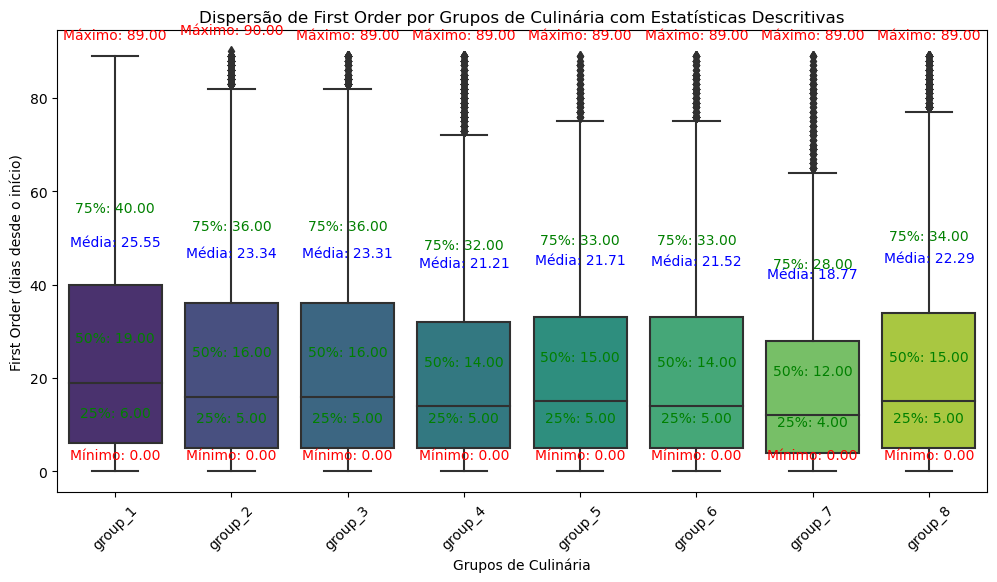

In [9]:
# Criar colunas para os grupos de culinária somando as colunas correspondentes
df['group_1'] = df[['CUI_Asian', 'CUI_Japanese', 'CUI_Chinese', 'CUI_Thai', 'CUI_Noodle Dishes']].sum(axis=1)
df['group_2'] = df[['CUI_American', 'CUI_Street Food / Snacks']].sum(axis=1)
df['group_3'] = df['CUI_Italian']
df['group_4'] = df['CUI_OTHER']
df['group_5'] = df['CUI_Healthy']
df['group_6'] = df['CUI_Indian']
df['group_7'] = df['CUI_Chicken Dishes']
df['group_8'] = df[['CUI_Beverages', 'CUI_Desserts', 'CUI_Cafe']].sum(axis=1)

# Criar um DataFrame com os grupos para facilitar o plot
grouped_df = pd.melt(df, id_vars=['first_order'], 
                     value_vars=['group_1', 'group_2', 'group_3', 'group_4', 'group_5', 'group_6', 'group_7', 'group_8'], 
                     var_name='Cuisine Group', 
                     value_name='Amount Spent')

# Filtrar apenas os registros onde o valor gasto é maior que 0
grouped_df = grouped_df[grouped_df['Amount Spent'] > 0]

# Criar um box plot para first_order em relação aos grupos de culinária
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=grouped_df, x='Cuisine Group', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
stats = grouped_df.groupby('Cuisine Group')['first_order'].describe()

# Adicionar as estatísticas ao gráfico com deslocamentos
offset_mean = 22.0  # Deslocamento para a média
offset_min = 2.0   # Deslocamento para o mínimo
offset_max = 3.0   # Deslocamento para o máximo
offset_q25 = 5.0   # Deslocamento para 25%
offset_q50 = 8.0   # Deslocamento para 50%
offset_q75 = 15.0   # Deslocamento para 75%

for i, group in enumerate(stats.index):
    # Extrair as estatísticas
    mean = stats.loc[group, 'mean']
    min_val = stats.loc[group, 'min']
    max_val = stats.loc[group, 'max']
    q25 = stats.loc[group, '25%']
    q50 = stats.loc[group, '50%']
    q75 = stats.loc[group, '75%']

    # Adicionar texto ao gráfico com deslocamento
    ax.text(i, mean + offset_mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val + offset_min, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val + offset_max, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25 + offset_q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50 + offset_q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75 + offset_q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Grupos de Culinária com Estatísticas Descritivas')
plt.xlabel('Grupos de Culinária')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

### DOW...

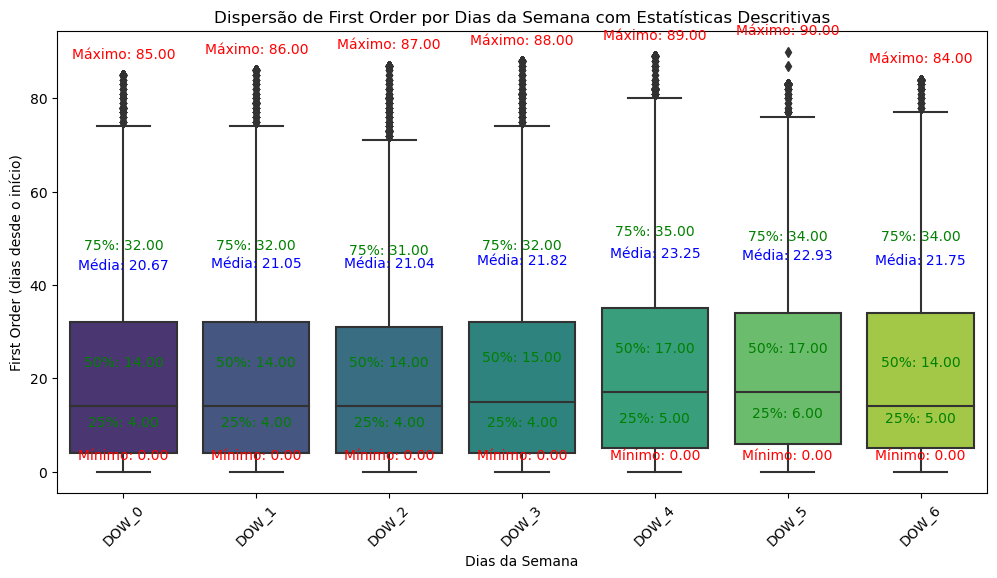

In [11]:
# Criar um DataFrame com as colunas de dias da semana
dow_df = pd.melt(df, id_vars=['first_order'], 
                 value_vars=['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'], 
                 var_name='Day of Week', 
                 value_name='Order Count')

# Filtrar apenas os registros onde o número de pedidos é maior que 0
dow_df = dow_df[dow_df['Order Count'] > 0]

# Criar um box plot para first_order em relação aos dias da semana
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=dow_df, x='Day of Week', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
dow_stats = dow_df.groupby('Day of Week')['first_order'].describe()

# Adicionar as estatísticas ao gráfico com deslocamentos
offset_mean = 22.0  # Deslocamento para a média
offset_min = 2.0   # Deslocamento para o mínimo
offset_max = 3.0   # Deslocamento para o máximo
offset_q25 = 5.0   # Deslocamento para 25%
offset_q50 = 8.0   # Deslocamento para 50%
offset_q75 = 15.0   # Deslocamento para 75%

for i, dow in enumerate(dow_stats.index):
    # Extrair as estatísticas
    mean = dow_stats.loc[dow, 'mean']
    min_val = dow_stats.loc[dow, 'min']
    max_val = dow_stats.loc[dow, 'max']
    q25 = dow_stats.loc[dow, '25%']
    q50 = dow_stats.loc[dow, '50%']
    q75 = dow_stats.loc[dow, '75%']

    # Adicionar texto ao gráfico com deslocamento
    ax.text(i, mean + offset_mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val + offset_min, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val + offset_max, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25 + offset_q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50 + offset_q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75 + offset_q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Dias da Semana com Estatísticas Descritivas')
plt.xlabel('Dias da Semana')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

### HR... 

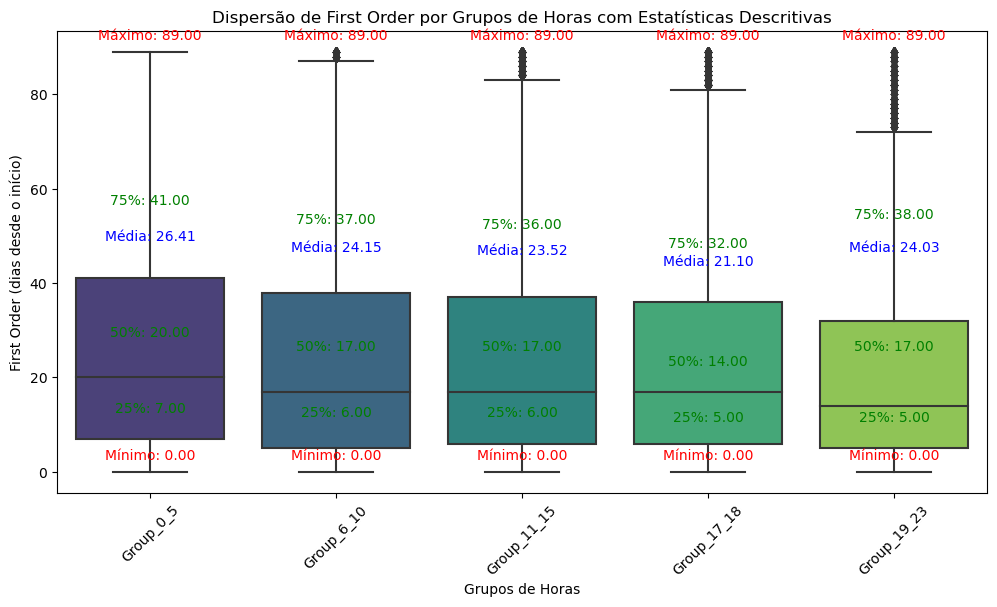

In [14]:
# Criar colunas para os grupos de horas somando as colunas correspondentes
df['Group_0_5'] = df[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']].sum(axis=1)
df['Group_6_10'] = df[['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10']].sum(axis=1)
df['Group_11_15'] = df[['HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15']].sum(axis=1)
df['Group_17_18'] = df[['HR_16', 'HR_17', 'HR_18']].sum(axis=1)
df['Group_19_23'] = df[['HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1)

# Criar um DataFrame com os grupos de horas para facilitar o plot
grouped_hour_df = pd.melt(df, id_vars=['first_order'], 
                           value_vars=['Group_0_5', 'Group_6_10', 'Group_11_15', 'Group_17_18', 'Group_19_23'], 
                           var_name='Hour Group', 
                           value_name='Order Count')

# Filtrar apenas os registros onde o número de pedidos é maior que 0
grouped_hour_df = grouped_hour_df[grouped_hour_df['Order Count'] > 0]

# Criar um box plot para first_order em relação aos grupos de horas
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=grouped_hour_df, x='Hour Group', y='first_order', palette='viridis')

# Calcular as estatísticas descritivas
hour_stats = grouped_hour_df.groupby('Hour Group')['first_order'].describe()

# Adicionar as estatísticas ao gráfico com deslocamentos
offset_mean = 22.0  # Deslocamento para a média
offset_min = 2.0   # Deslocamento para o mínimo
offset_max = 2.0   # Deslocamento para o máximo
offset_q25 = 5.0   # Deslocamento para 25%
offset_q50 = 8.0   # Deslocamento para 50%
offset_q75 = 15.0   # Deslocamento para 75%

for i, group in enumerate(hour_stats.index):
    # Extrair as estatísticas
    mean = hour_stats.loc[group, 'mean']
    min_val = hour_stats.loc[group, 'min']
    max_val = hour_stats.loc[group, 'max']
    q25 = hour_stats.loc[group, '25%']
    q50 = hour_stats.loc[group, '50%']
    q75 = hour_stats.loc[group, '75%']

    # Adicionar texto ao gráfico com deslocamento
    ax.text(i, mean + offset_mean, f'Média: {mean:.2f}', color='blue', ha='center', va='bottom')
    ax.text(i, min_val + offset_min, f'Mínimo: {min_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, max_val + offset_max, f'Máximo: {max_val:.2f}', color='red', ha='center', va='bottom')
    ax.text(i, q25 + offset_q25, f'25%: {q25:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q50 + offset_q50, f'50%: {q50:.2f}', color='green', ha='center', va='bottom')
    ax.text(i, q75 + offset_q75, f'75%: {q75:.2f}', color='green', ha='center', va='bottom')

plt.title('Dispersão de First Order por Grupos de Horas com Estatísticas Descritivas')
plt.xlabel('Grupos de Horas')
plt.ylabel('First Order (dias desde o início)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()